In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [15]:
df = pd.read_csv("D:\\Skills\\SUMMER PROJECTS\\TML\\DBSCAN_Data.csv")
n = df.shape[0]
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


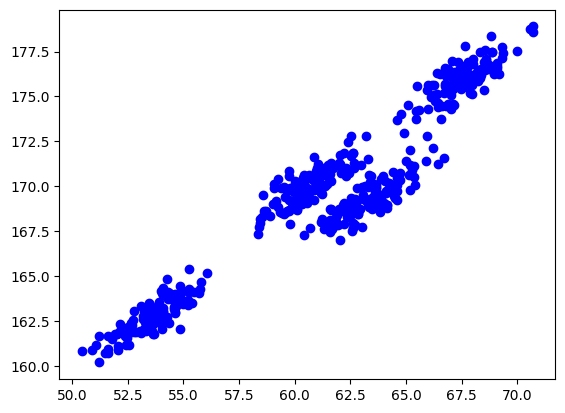

In [119]:
plt.scatter(df['Weight'], df['Height'], color='blue')

In [157]:
class Point2D:
    def __init__(self, x, y, ClusterID, Neighbours):
        self.x = x
        self.y = y
        self.PointType = None
        self.ClusterID = ClusterID
        self.Neighbours = Neighbours

def Distance(P1, P2):
    distance = np.sqrt((P2.x-P1.x)**2 + (P2.y-P1.y)**2)
    return distance

In [182]:
Points = []

for i in range(n):
    x = df.iloc[i, 0]
    y = df.iloc[i, 1]
    tempPoint = Point2D(x, y, None, [])
    Points.append(tempPoint)

In [183]:
EPSILON = 0.6
MINP = 4

corePoints = []
NonCorePoints = []

for P1 in Points:
    minPointCount = 0
    for P2 in Points:
        if Distance(P1, P2) <= EPSILON:
            minPointCount += 1
            (P1.Neighbours).append(P2)
    if minPointCount >= MINP:
        corePoints.append(P1)
        P1.PointType = 'Core'
    else:
        NonCorePoints.append(P1)
        P1.PointType = 'NonCore'

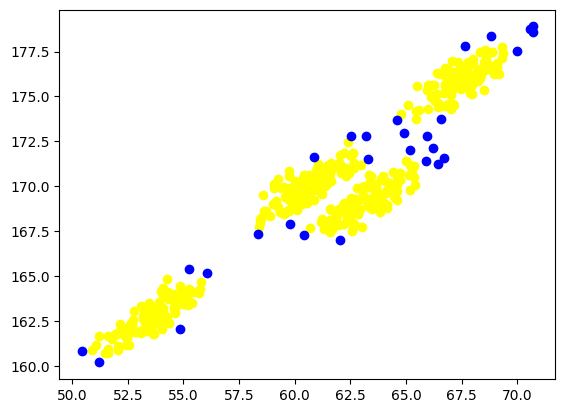

In [171]:
for point in corePoints:
    plt.scatter(point.x, point.y, color='yellow')

for point in NonCorePoints:
    plt.scatter(point.x, point.y, color='blue')

In [184]:
def Spread(Point, C):
    for neighbour_point in Point.Neighbours:
        if neighbour_point.ClusterID is None:
            neighbour_point.ClusterID = C
            if neighbour_point.PointType == 'Core':
                Spread(neighbour_point, C)


def DBSCAN(corePoints, C):
    for point in corePoints:
        if point.ClusterID is None:
            Spread(point, C)
            C += 1


In [185]:
DBSCAN(corePoints, 0)

In [186]:
Point_Dict = {'x': [], 'y': [], 'ID': []}
for Point in Points:
    x, y, ID = Point.x, Point.y, Point.ClusterID
    Point_Dict['x'].append(x)
    Point_Dict['y'].append(y)
    Point_Dict['ID'].append(ID)

dfModified = pd.DataFrame(Point_Dict)


In [187]:
dfModified

,x,y,ID
0,67.062924,176.086355,0.0
1,68.804094,178.388669,NaN
2,60.930863,170.284496,1.0
3,59.733843,168.691992,1.0
4,65.431230,173.763679,0.0
...,...,...,...
495,59.976983,169.679741,1.0
496,66.423814,174.625574,0.0
497,53.604698,161.919208,3.0
498,50.433644,160.794875,3.0


In [188]:
# mapping nan(noise) to -1
dfModified['ID'] = dfModified['ID'].fillna(-1)

In [189]:
dfModified['ID'].unique()

array([ 0., -1.,  1.,  2.,  3.])

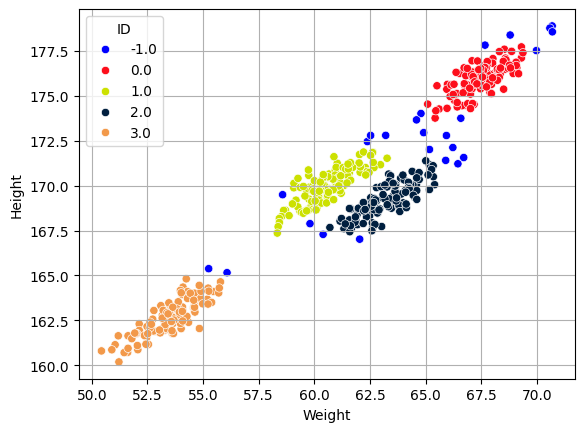

In [192]:
color_palette = [
    "#0000FF",  # blue ( for noise )
    "#FD0E1B",  # Fire Engine Red
    "#CCE100",  # Electric Lime
    "#001F3F",  # Royal Blue
    "#F2994A",  # Tangerine
]


sns.scatterplot(data=dfModified, x='x', y='y', hue='ID', palette=color_palette)
plt.grid(True)

plt.xlabel('Weight')
plt.ylabel('Height')

plt.show()